### PCA

In [41]:
import os
from skimage import io
import numpy as np
import scipy.misc

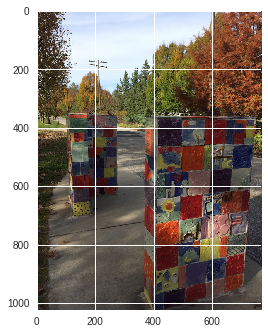

In [42]:
img = scipy.misc.imread("data/IMG_1878.JPG")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [43]:
img.shape

(1024, 768, 3)

In [44]:
XR = img[:, :, 0]
XG = img[:, :, 1]
XB = img[:, :, 2]

In [ ]:
XR.shape

In [45]:
import random

In [46]:
r = []
for i in range(9):
    rand_no = random.randint(1, 1018)
    r.append(rand_no)

In [47]:
# Get 9 blocks
R = np.column_stack((np.array(XR[r[0]:r[0] + 8, :]),
                     np.array(XR[r[1]:r[1] + 8, :]),
                     np.array(XR[r[2]:r[2] + 8, :]),
                     np.array(XG[r[3]:r[3] + 8, :]),
                     np.array(XG[r[4]:r[4] + 8, :]),
                     np.array(XG[r[5]:r[5] + 8, :]),
                     np.array(XB[r[6]:r[6] + 8, :]),
                     np.array(XB[r[7]:r[7] + 8, :]),
                     np.array(XB[r[8]:r[8] + 8, :])))

In [48]:
# Calculates the covariance for a given matrix

def cov_matrix(matrix):
    sample = matrix.shape[0] -1
    centered_matrix = (np.transpose(matrix) - np.mean(matrix, axis = 1)).transpose()
    covmat = np.dot(centered_matrix, centered_matrix.transpose()) / sample
    return covmat

In [49]:
# For eigen vectors

def power_iteration(X):
    Y = np.random.rand(X.shape[0])
    for i in range(1, 10000):
        temp = np.dot(X, Y)
        temp_norm = np.linalg.norm(temp)
        Y = temp/temp_norm
    return Y;

In [50]:
cov_R = cov_matrix(R)

In [51]:
matrix = cov_R
N = matrix.shape[0]
E_vec = np.zeros((N, N))
E_val = np.zeros(N)

In [52]:
for i in range(0, N):
    E_vec[i, :] = np.array([power_iteration(matrix)])
    E_val[i] = np.linalg.norm(np.dot(matrix, np.transpose(E_vec[i:i+1,:])))
    matrix = matrix - E_val[i] * np.dot(np.transpose(E_vec[i:i+1,:]), E_vec[i:i+1, :])

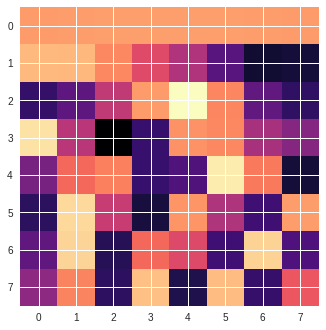

In [53]:
plt.imshow(E_vec, cmap = "magma")
plt.show()

In [54]:
r = []
for i in range(30):
    rand_no = random.randint(1, 1018)
    r.append(rand_no)   

In [55]:
xr = XR[r[0]:r[0] + 8, :]
xg = XG[r[0]:r[0] + 8, :]
xb = XB[r[0]:r[0] + 8, :]

In [56]:
for i in range(1, 30):
    xr = np.column_stack((xr, (XR[r[i]:r[i] + 8, :])))
    xg = np.column_stack((xg, (XG[r[i]:r[i] + 8, :])))
    xb = np.column_stack((xb, (XB[r[i]:r[i] + 8, :])))

In [57]:
# 90 blocks
R = np.column_stack((xr, xg, xb))
R.shape

(8, 69120)

In [58]:
cov_R = cov_matrix(R)

In [59]:
matrix = cov_R
N = matrix.shape[0]
E_vec = np.zeros((N, N))
E_val = np.zeros(N)

In [60]:
for i in range(0, N):
    E_vec[i, :] = np.array([power_iteration(matrix)])
    E_val[i] = np.linalg.norm(np.dot(matrix, np.transpose(E_vec[i:i+1,:])))
    matrix = matrix - E_val[i] * np.dot(np.transpose(E_vec[i:i+1,:]), E_vec[i:i+1, :])

In [61]:
E_vec.shape

(8, 8)

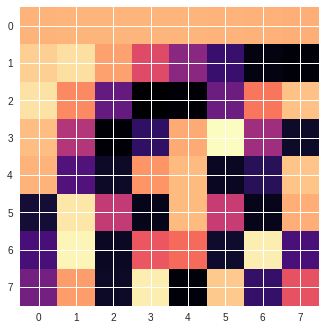

In [62]:
plt.imshow(E_vec, cmap = "magma")
plt.show()